# ETL Pipeline (Data Cleaning, Transformation, and Integration)

In [1]:
# run this only once
# from etl import etl_pipeline
# etl_pipeline()

# Data Selection

In [8]:
import matplotlib.pyplot as plt
from select_data import select_data

In [3]:
hosts = select_data("SELECT * FROM hosts")

hosts.head(10)

,host_id,host_name
0,23039,Connekt
1,44636,Madhavi
2,50838,Nikos
3,52656,Julie
4,58959,Lanta Pole Houses
5,60971,Foxden Hospitality
6,70273,Rafa
7,70485,Dave
8,121951,Mark
9,124095,Vlado


In [4]:
countries = select_data("SELECT * FROM countries")

countries.head(10)

,country_id,country_name
0,1,Turkey
1,2,Georgia
2,3,Vietnam
3,4,South Korea
4,5,India
5,6,Philippines
6,7,Japan
7,8,Taiwan
8,9,Israel
9,10,Armenia


In [5]:
properties = select_data("SELECT * FROM properties")

properties.head(10)

,id,name,rating,reviews,host_id,address,price_local,country_id,bathrooms,beds,guests,toilets,bedrooms,studios,checkin,checkout
0,13131,Green Windmill,5.00,8,50838,"Imerovigli, Santorini, Greece",46336.0,19,3,3,5,0,2,0,14:00:00,11:00:00
1,13443,Lilac Windmill Villa,5.00,10,50838,"Imerovigli, Santorini, Greece",46205.0,19,3,3,5,0,2,0,14:00:00,11:00:00
2,13464,Borgia Castle in Tuscany - Italy,4.69,16,52656,"Passignano Sul Trasimeno, Umbria, Italy",113648.0,46,6,8,13,0,7,0,21:00:00,11:00:00
3,48289,cavehouse with caldera sunsetview,4.84,187,219945,"Oia, Νότιο Αιγαίο, Greece",15402.0,19,1,1,2,0,1,0,22:00:00,11:00:00
4,53243,Trullo aromatic green,4.91,93,247627,"Ostuni, Apúlia, Italy",15425.0,46,2,3,4,0,2,0,21:00:00,10:00:00
5,65773,Luxury Thai Style Villa Surin Beach - 6 Bedrooms,4.71,66,6189670,"Srisuntron Rd. Charng Talay, Phuket, Thailand",56723.0,12,6,7,12,0,6,0,15:00:00,11:00:00
6,71164,Charming B&B located in South Delhi,4.70,103,362987,"New Delhi, India",3195.0,5,1,1,3,0,1,0,13:00:00,12:00:00
7,86023,Blue Windmill Villa,5.00,18,50838,"Imerovigli, Santorini, Greece",50735.0,19,3,3,6,0,2,0,14:00:00,11:00:00
8,87768,Ikaros Apartments on Naxos island,4.89,61,480552,"Naxos, Egeo, Greece",6306.0,19,1,3,4,0,2,0,13:00:00,11:00:00
9,89363,Romantic cosy flat - Toscana Italy,4.97,30,243462,"Subbiano, Tuscany, Italy",7779.0,46,1,2,4,0,2,0,13:00:00,11:00:00


# Exploratory Data Analysis

In [6]:
properties.describe()

,id,rating,reviews,host_id,price_local,country_id,bathrooms,beds,guests,toilets,bedrooms,studios
count,1.018900e+04,10189.000000,10189.00000,1.018900e+04,1.018900e+04,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000
mean,6.166293e+16,4.858210,42.06772,1.561563e+08,1.779098e+04,26.757385,1.858966,3.258907,5.236039,0.018255,2.114339,0.024536
std,1.838614e+17,0.119855,70.93141,1.363693e+08,4.372310e+04,26.134603,1.964505,3.610598,3.733376,0.133879,2.129259,0.154715
min,1.313100e+04,3.000000,0.00000,2.303900e+04,5.900000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.965750e+07,4.820000,2.00000,3.603033e+07,4.441000e+03,5.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000
50%,3.489892e+07,4.860000,15.00000,1.184133e+08,8.674000e+03,19.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000
75%,4.895175e+07,4.940000,51.00000,2.508569e+08,1.657600e+04,46.000000,2.000000,4.000000,6.000000,0.000000,3.000000,0.000000
max,7.017905e+17,5.000000,1003.00000,4.758973e+08,1.907963e+06,139.000000,30.000000,60.000000,16.000000,1.000000,34.000000,1.000000


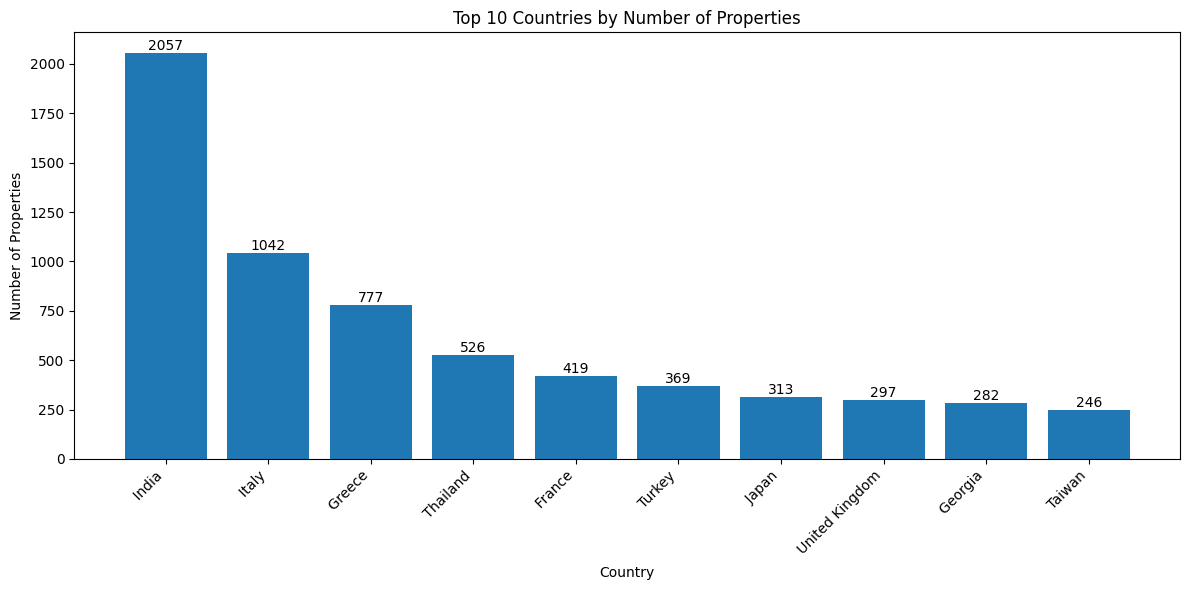

In [10]:
countries_with_most_properties = select_data("""
    SELECT c.country_name, COUNT(*) as property_count
    FROM properties p
    JOIN countries c ON p.country_id = c.country_id
    GROUP BY c.country_id, c.country_name
    ORDER BY property_count DESC
    LIMIT 10;
""")

plt.figure(figsize=(12, 6))
plt.bar(countries_with_most_properties['country_name'], countries_with_most_properties['property_count'])
plt.title('Top 10 Countries by Number of Properties')
plt.xlabel('Country')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(countries_with_most_properties['property_count']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Data Mining Algorithm